# Proyek Analisis Data: E-Commerce
- Nama: Ahmad Agriansyah
- Email: ahmadagriansyah1@gmail.com
- Id Dicoding: ahmadagriansyah

## Menentukan Pertanyaan Bisnis

- Berapa banyaknya order/invoice per bulan?
- Negara dengan pembelian terbanyak per bulan? (berdasarkan 5 negara teratas periode terakhir)

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, os

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [2]:
customer_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Visualization/Data/customers_dataset.csv')
geolocation_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Visualization/Data/geolocation_dataset.csv')
items_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Visualization/Data/order_items_dataset.csv')
payments_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Visualization/Data/order_payments_dataset.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Visualization/Data/order_reviews_dataset.csv')
orders_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Visualization/Data/orders_dataset.csv')
category_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Visualization/Data/product_category_name_translation.csv')
products_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Visualization/Data/products_dataset.csv')
sellers_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Visualization/Data/sellers_dataset.csv')

###Assessing Data

####Orders

In [17]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
orders_df.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [5]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [6]:
orders_df.duplicated().sum()

0

####Items

In [18]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [19]:
items_df.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [9]:
items_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [10]:
items_df.duplicated().sum()

0

####Payments

In [15]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [12]:
payments_df.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [13]:
payments_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [14]:
payments_df.duplicated().sum()

0

####Products

In [20]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
products_df.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [ ]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
products_df.duplicated().sum()

0

### Cleaning Data

In [31]:
#transform waktu pembelian ke tipe data waktu
datetime_columns = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [ ]:
#melihat data null
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [ ]:
##grouping berdasarkan order status
orders_df.groupby(by='order_status').customer_id.nunique()

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: customer_id, dtype: int64

In [ ]:
##memastikan data yang ditampilkan dalam hitungan bulan
orders_df = orders_df.loc[(orders_df["order_purchase_timestamp"] > "2016-12-31") & (orders_df["order_purchase_timestamp"] < "2018-09-01")]

In [39]:
##transform tipe kolom ke datetime
items_df['shipping_limit_date'] = pd.to_datetime(items_df['shipping_limit_date'])

In [38]:
##menampilkan data null sekaligus dropping
products_df[products_df.product_category_name.isna()]
products_df.dropna(inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

In [28]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [32]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [34]:
orders_df.groupby(by="order_status").customer_id.count()

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: customer_id, dtype: int64

In [40]:
items_df.describe(include='all')

<ipython-input-40-13685d7ba20e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  items_df.describe(include='all')


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000


In [43]:
orders_items_df = pd.merge(
    left=orders_df,
    right=items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_items_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [41]:
payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [45]:
payments_df.groupby(by='payment_type').order_id.nunique()

payment_type
boleto         19784
credit_card    76505
debit_card      1528
not_defined        3
voucher         3866
Name: order_id, dtype: int64

In [46]:
orders_payments_items_df = pd.merge(
    left=orders_items_df,
    right=payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_payments_items_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12


In [42]:
products_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [48]:
products_df.groupby(by='product_category_name').product_id.nunique()

product_category_name
agro_industria_e_comercio      74
alimentos                      82
alimentos_bebidas             104
artes                          55
artes_e_artesanato             19
                             ... 
sinalizacao_e_seguranca        93
tablets_impressao_imagem        9
telefonia                    1134
telefonia_fixa                116
utilidades_domesticas        2335
Name: product_id, Length: 73, dtype: int64

In [58]:
all_df = pd.merge(
    left=orders_payments_items_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,...,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,1.0,...,1.0,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,1.0,...,1.0,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,1.0,...,1.0,18.59,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,1.0,...,1.0,141.46,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,1.0,...,3.0,179.12,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0


## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [50]:
#pembuatan tabel monthly orders
all_df = all_df.set_index("order_purchase_timestamp")["order_id"].resample("M").nunique()
all_df

order_purchase_timestamp
2016-09-30       4
2016-10-31     324
2016-11-30       0
2016-12-31       1
2017-01-31     800
2017-02-28    1780
2017-03-31    2682
2017-04-30    2404
2017-05-31    3700
2017-06-30    3245
2017-07-31    4026
2017-08-31    4331
2017-09-30    4285
2017-10-31    4631
2017-11-30    7544
2017-12-31    5673
2018-01-31    7269
2018-02-28    6728
2018-03-31    7211
2018-04-30    6939
2018-05-31    6873
2018-06-30    6167
2018-07-31    6292
2018-08-31    6512
2018-09-30      16
2018-10-31       4
Freq: M, Name: order_id, dtype: int64

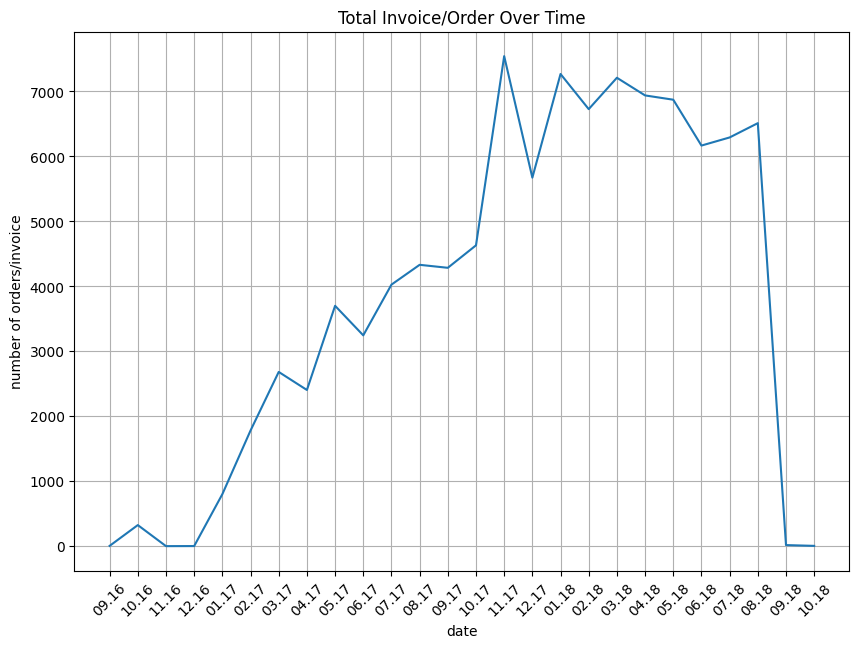

In [52]:
#visualisasi data orders per bulan
ax = pd.DataFrame(all_df.values).plot(
    grid = True,
    figsize = (10,7),
    legend = False
)

ax.set_xlabel("date")
ax.set_ylabel("number of orders/invoice")
ax.set_title("Total Invoice/Order Over Time")

plt.xticks(
    range(len(all_df.index)),
    [x.strftime("%m.%y") for x in all_df.index],
    rotation = 45
)

plt.show()

### Pertanyaan 2:

In [66]:
#pembuatan tabel monthly orders by product category
product_category_df = pd.DataFrame(
    all_df.set_index("order_purchase_timestamp").groupby([
        pd.Grouper(freq="M"), "product_category_name"
    ])["order_id"].count()
)

customer_state_df

order_id
order_purchase_timestamp product_category_name                                   
2016-09-30               beleza_saude                                           3
                         moveis_decoracao                                       2
                         telefonia                                              1
2016-10-31               alimentos                                              1
                         audio                                                  2
...                                                                           ...
2018-08-31               sinalizacao_e_seguranca                               22
                         telefonia                                            289
                         telefonia_fixa                                        10
                         utilidades_domesticas                                650
2018-09-30               moveis_cozinha_area_de_servico_jantar_e_jardim         1

[1262 rows x 1 columns]

In [67]:
#mencari 5 produk kategori teratas berdasarkan invoice/orders terbanyak di periode terakhir
last_month_product_category_df = product_category_df.loc["2018-08-31"].sort_values(
    by="order_id", ascending=False
).reset_index()

last_month_product_category_df

,product_category_name,order_id
0,beleza_saude,878
1,cama_mesa_banho,676
2,utilidades_domesticas,650
3,esporte_lazer,480
4,moveis_decoracao,461
...,...,...
60,fashion_underwear_e_moda_praia,2
61,livros_importados,1
62,pc_gamer,1
63,dvds_blu_ray,1


In [71]:
#group 5 produk kategori teratas berdasarkan invoice/orders terbanyak
product_category_df = pd.DataFrame(
    all_df.loc[
        all_df["product_category_name"].isin(["beleza_saude","cama_mesa_banho","utilidades_domesticas","esporte_lazer","moveis_decoracao"])
    ].set_index("order_purchase_timestamp").groupby([
        pd.Grouper(freq="M"), "product_category_name"
    ])["order_id"].count()
)

product_category_df

order_id
order_purchase_timestamp product_category_name          
2016-09-30               beleza_saude                  3
                         moveis_decoracao              2
2016-10-31               beleza_saude                 50
                         cama_mesa_banho               8
                         esporte_lazer                19
...                                                  ...
2018-08-31               beleza_saude                878
                         cama_mesa_banho             676
                         esporte_lazer               480
                         moveis_decoracao            461
                         utilidades_domesticas       650

[107 rows x 1 columns]

In [73]:
#transpose tabel
trending_category_df = product_category_df.reset_index().pivot(index="order_purchase_timestamp", columns="product_category_name").fillna(0)

trending_category_df = trending_category_df.reset_index()
trending_category_df = trending_category_df.set_index("order_purchase_timestamp")
trending_category_df.columns = trending_category_df.columns.droplevel(0)

trending_category_df

product_category_name,beleza_saude,cama_mesa_banho,esporte_lazer,moveis_decoracao,utilidades_domesticas
order_purchase_timestamp,,,,,
2016-09-30,3.0,0.0,0.0,2.0,0.0
2016-10-31,50.0,8.0,19.0,75.0,12.0
2017-01-31,91.0,50.0,84.0,198.0,29.0
2017-02-28,185.0,178.0,167.0,281.0,83.0
2017-03-31,215.0,316.0,215.0,343.0,223.0
2017-04-30,193.0,307.0,224.0,213.0,191.0
2017-05-31,301.0,419.0,326.0,317.0,323.0
2017-06-30,272.0,420.0,288.0,241.0,353.0
2017-07-31,324.0,622.0,414.0,345.0,300.0


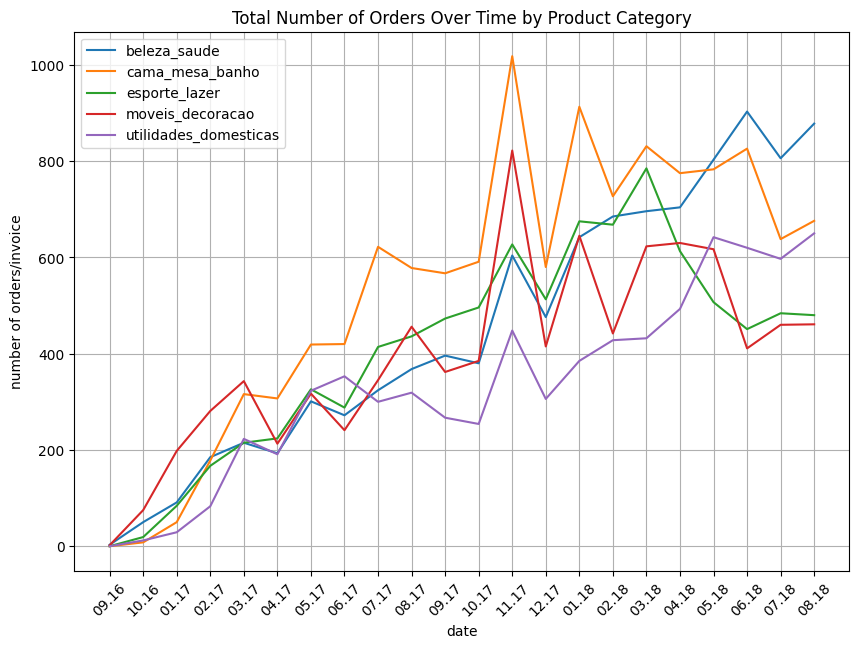

In [74]:
#visualisasi data orders per bulan
ax = pd.DataFrame(trending_category_df.values).plot(
    grid = True,
    figsize = (10,7),
    legend = False
)

ax.set_xlabel("date")
ax.set_ylabel("number of orders/invoice")
ax.set_title("Total Number of Orders Over Time by Product Category")

ax.legend(trending_category_df.columns, loc="upper left")

plt.xticks(
    range(len(trending_category_df.index)),
    [x.strftime("%m.%y") for x in trending_category_df.index],
    rotation = 45
)

plt.show()

## Conclusion

- Jumlah orders/invoice tiap bulan secara umum mengalami peningkatan dengan invoice terbanyak jatuh pada bulan November 2017
- Ada 5 kategori produk yang menjadi basis pelanggan terbanyak perusahaan ini secara berurutan yaitu beleza_saude (Kecantikan dan Kesehatan), cama_mesa_banho (Tempat tidur, meja dan kamar mandi), esporte_lazer (Olahraga dan Rekreasi), movies_decoracao (Film dan Dekorasi) dan utilades_domesticas (Peralatan Rumah Tangga). beleza_saude (Kecantikan dan Kesehatan) menjadi kategori produk dengan basis pelanggan terbanyak perusahaan ini dengan dimulai pada bulan Mei 2018 yang sebelumnya ditempati oleh cama_mesa_banho (Tempat tidur, meja dan kamar mandi)